<a href="https://colab.research.google.com/github/JungseoChoi/CJSbioinformatics/blob/main/bioinformatics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파일 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# anaconda 환경 불러오기

In [ ]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

In [ ]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

In [ ]:
!conda install -y subread

In [ ]:
%cd /content/drive/MyDrive/binfo1-project
!cp ../binfo1-datapack1/*.* .

In [ ]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam 

In [ ]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

In [ ]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

In [ ]:
# 최소 10 이상의 read count를 가진 행들만 선택
filtered_data = cnts[(cnts['CLIP-35L33G.bam'] >= 10) &
                     (cnts['RNA-control.bam'] >= 10) &
                     (cnts['RPF-siLin28a.bam'] >= 10) &
                     (cnts['RNA-siLin28a.bam'] >= 10) &
                     (cnts['RPF-siLuc.bam'] >= 10) &
                     (cnts['RNA-siLuc.bam'] >= 10)]
filtered_data.head()

In [69]:
cnts['gene_id'] = cnts.index.to_series().str.split('.').str[0]
filtered_data = cnts
filtered_data.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000102693
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000064842
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,1,1,1,0,0,4.0,NaN,ENSMUSG00000051951
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,inf,NaN,ENSMUSG00000102851
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000103377


In [70]:
# 'gene_id' 열만 선택하여 새로운 데이터프레임 생성
subset = filtered_data[['gene_id']] 
subset.to_csv('output_gene_id.txt', sep='\t', index=False)

# Uniprot에서 Ensemble을 기준으로 matching을 시킨다음 tsv파일로 불러왔음.

In [52]:
# 가져온 tsv파일을 이용해 파일 읽기
GO_term = pd.read_csv('GO_term.tsv', sep='\t', index_col=0)
GO_term

,Entry,Gene Ontology (GO),Entry Name,Gene Names
From,,,,
ENSMUSG00000025903,P97823,cell surface [GO:0009986]; cytoplasm [GO:00057...,LYPA1_MOUSE,Lypla1 Apt1 Pla1a
ENSMUSG00000025903,D3YUG4,hydrolase activity [GO:0016787],D3YUG4_MOUSE,Lypla1
ENSMUSG00000025903,D3Z111,hydrolase activity [GO:0016787],D3Z111_MOUSE,Lypla1
ENSMUSG00000025903,D3Z269,hydrolase activity [GO:0016787],D3Z269_MOUSE,Lypla1
ENSMUSG00000025903,J3QP56,hydrolase activity [GO:0016787],J3QP56_MOUSE,Lypla1
...,...,...,...,...
ENSMUSG00000064345,P03893,mitochondrial inner membrane [GO:0005743]; mit...,NU2M_MOUSE,mt-Nd2 Nd2
ENSMUSG00000064351,P00397,mitochondrial inner membrane [GO:0005743]; mit...,COX1_MOUSE,Mtco1 COI mt-Co1
ENSMUSG00000064363,P03911,mitochondrial inner membrane [GO:0005743]; mit...,NU4M_MOUSE,Mtnd4 mt-Nd4 Nd4


In [53]:
# From column을 gene_id을 추가
GO_term['gene_id'] = GO_term.index.to_series()
GO_term

,Entry,Gene Ontology (GO),Entry Name,Gene Names,gene_id
From,,,,,
ENSMUSG00000025903,P97823,cell surface [GO:0009986]; cytoplasm [GO:00057...,LYPA1_MOUSE,Lypla1 Apt1 Pla1a,ENSMUSG00000025903
ENSMUSG00000025903,D3YUG4,hydrolase activity [GO:0016787],D3YUG4_MOUSE,Lypla1,ENSMUSG00000025903
ENSMUSG00000025903,D3Z111,hydrolase activity [GO:0016787],D3Z111_MOUSE,Lypla1,ENSMUSG00000025903
ENSMUSG00000025903,D3Z269,hydrolase activity [GO:0016787],D3Z269_MOUSE,Lypla1,ENSMUSG00000025903
ENSMUSG00000025903,J3QP56,hydrolase activity [GO:0016787],J3QP56_MOUSE,Lypla1,ENSMUSG00000025903
...,...,...,...,...,...
ENSMUSG00000064345,P03893,mitochondrial inner membrane [GO:0005743]; mit...,NU2M_MOUSE,mt-Nd2 Nd2,ENSMUSG00000064345
ENSMUSG00000064351,P00397,mitochondrial inner membrane [GO:0005743]; mit...,COX1_MOUSE,Mtco1 COI mt-Co1,ENSMUSG00000064351
ENSMUSG00000064363,P03911,mitochondrial inner membrane [GO:0005743]; mit...,NU4M_MOUSE,Mtnd4 mt-Nd4 Nd4,ENSMUSG00000064363


In [ ]:
merged_GO = pd.merge(filtered_data, GO_term, on='gene_id')
merged_GO

In [ ]:
#merged_GO에서 원하는 column만 보이게.
subsets_GO = merged_GO[['gene_id', 'clip_enrichment', 'rden_change', 'Gene Ontology (GO)']].set_index('gene_id')
subsets_GO

In [ ]:
# Gene ontology (GO)에서 [GO:0009986]을 없애기
import re
pattern = re.compile(r'\s*\[GO:\d+\]\s*' )
subsets_GO['Gene Ontology (GO)'] = subsets_GO['Gene Ontology (GO)'].str.replace(pattern, '')
subsets_GO

In [72]:
# Gene ontology (GO)에서 ';'을 기준으로 새로운 행으로 만들기 ##여기서 너무 많은 행이 생김.단순화 할 수 있는 방법이 없을까?
subsets_GO = subsets_GO.assign(**{'Gene Ontology (GO)': subsets_GO['Gene Ontology (GO)'].str.split(';')}).explode('Gene Ontology (GO)')
subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface
ENSMUSG00000025903,3.562718,0.760459,cytoplasm
ENSMUSG00000025903,3.562718,0.760459,cytosol
ENSMUSG00000025903,3.562718,0.760459,endoplasmic reticulum
ENSMUSG00000025903,3.562718,0.760459,mitochondrion
...,...,...,...
ENSMUSG00000064368,0.843117,1.263780,mitochondrial respiratory chain complex I ass...
ENSMUSG00000064368,0.843117,1.263780,proton motive force-driven mitochondrial ATP ...
ENSMUSG00000064368,0.843117,1.263780,response to cocaine


In [ ]:
#GO_term에 따라 clip-enrichment값과 rden_change값이 Mann-Whitney U test를 통해 제대로 차이가 있는 것인지 확인.


In [64]:
# Gene Ontology (GO) 값이 같은 행들을 그룹화하고 그룹화한 행의 개수, clip_enrichment와 rden_change의 평균값 계산
GO_heatmap = subsets_GO.groupby('Gene Ontology (GO)').agg({'clip_enrichment': 'mean', 'rden_change': 'mean'}).reset_index()
GO_heatmap = GO_heatmap.rename(columns={'clip_enrichment': 'clip_enrichment_mean'})
GO_heatmap = GO_heatmap.rename(columns={'rden_change': 'rden_change_mean'})

GO_heatmap['GO_count'] = subsets_GO.groupby('Gene Ontology (GO)').size().values

GO_heatmap.set_index('Gene Ontology (GO)')

,clip_enrichment_mean,rden_change_mean,GO_count
Gene Ontology (GO),,,
'de novo' AMP biosynthetic process,1.845678,0.338816,3
'de novo' CTP biosynthetic process,1.594703,0.321192,3
'de novo' GDP-L-fucose biosynthetic process,3.447368,0.325757,1
'de novo' IMP biosynthetic process,1.199520,0.304372,4
'de novo' NAD biosynthetic process,0.886364,0.541304,1
...,...,...,...
voltage-gated calcium channel complex,1.735294,0.356918,2
voltage-gated potassium channel complex,0.984496,0.553360,4
voltage-gated sodium channel complex,3.048077,0.646559,4


In [65]:
# GO_count의 수가 너무 많은데, 이게 정상적인 숫자인지..? 맞음
GO_heatmap_sorted = GO_heatmap.sort_values(by='GO_count', ascending=False).reset_index(drop=True)
GO_heatmap_sorted

,Gene Ontology (GO),clip_enrichment_mean,rden_change_mean,GO_count
0,nucleus,2.269098,0.523055,3157
1,cytoplasm,2.162299,0.541000,2276
2,nucleoplasm,2.223938,0.510770,1748
3,cytosol,2.069363,0.519553,1624
4,cytoplasm,2.266203,0.543745,1558
...,...,...,...,...
14712,outer dense plaque of desmosome,4.298812,0.484695,1
14713,outer acrosomal membrane,9.274595,0.797880,1
14714,otolith mineralization,5.052632,0.782609,1
14715,otolith formation,3.160000,0.676944,1


In [66]:
#GO_count 중 상위 200개의 GO_count에 해당하는 값만 sort함.
GO_heatmap_filtered = GO_heatmap.nlargest(200, 'GO_count')
GO_heatmap_filtered

,Gene Ontology (GO),clip_enrichment_mean,rden_change_mean,GO_count
8055,nucleus,2.269098,0.523055,3157
14217,cytoplasm,2.162299,0.541000,2276
8013,nucleoplasm,2.223938,0.510770,1748
3445,cytosol,2.069363,0.519553,1624
3401,cytoplasm,2.266203,0.543745,1558
...,...,...,...,...
2113,autophagy,1.973626,0.603881,86
6409,mitotic spindle,2.211408,0.531802,86
7777,neuron differentiation,2.935163,0.627030,86
3756,double-stranded DNA binding,5.494827,0.524180,85


각 GO term에서 해당하는 CLIP_Enrichment, rden_change에서의 값이 GO term에 해당하지 않는 값들과 비교했을 때 유의미한 차이가 있는지 확인하는게 Mann-Whitney U test임. 그래서 이걸 먼저 해서, 각 p-value를 구한 다음, 거기서 fdr을 구해서 그 값들에 대해서 heatmap dot plot을 그리면 됨.
(교수님이 phythonpy에 굉장히 편리한 Mann-Whitney U test가 있다고 함)

추가적으로 dot이 많이 나오는데, 여기서 10개 이상으로 제한을 두거나, 25 이상을 제한을 두거나 해서 그림을 그리면 됨.
그 후 fdr값을 기준으로 진하기를 표시하고 상위13개 GO_count 값만 표현하면괜찮을 것 같음..

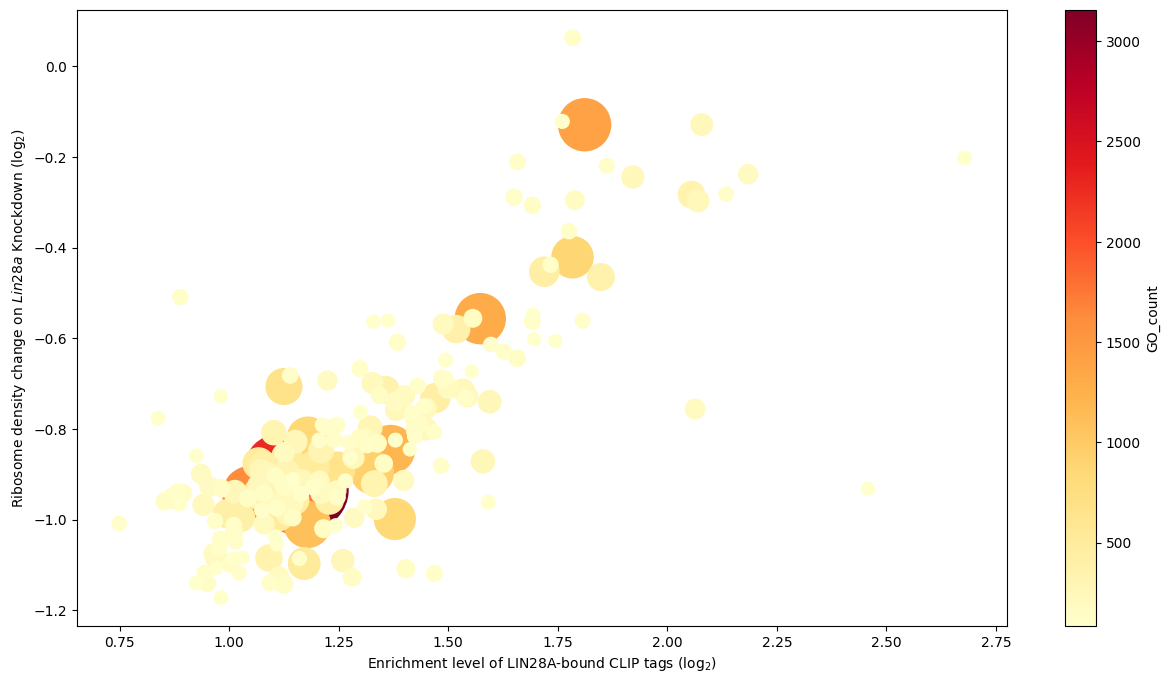

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# log2 변환
x = np.log2(GO_heatmap_filtered['clip_enrichment_mean'])
y = np.log2(GO_heatmap_filtered['rden_change_mean'])
sizes = GO_heatmap_filtered['GO_count']

# 그래프 그리기
plt.figure(figsize=(15,8))
plt.scatter(x, y, s=sizes, c=sizes, cmap='YlOrRd')
plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log$_{2}$)")
plt.ylabel("Ribosome density change on $\it{Lin28a}$ Knockdown (log$_{2}$)")

# Size를 그래프에 표시 (상위 10개만)
top_sizes = sizes.nlargest(10)  # 상위 10개의 size 값만 선택


plt.colorbar(label='GO_count')
plt.show()